# Exploratory Data Analysis (EDA)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

fc-list: ../../src/fccache.c:808: FcCacheFini: Assertion `fcCacheChains[i] == NULL' failed.


In [3]:
water = pd.read_csv('dataset/drinking_water_potability.csv')

## The Dataset

The dataset consists of 3276 observations and 10 variables, all of which are numerical except for the last one, 'Potability,' which is a categorical/binary variable.

In [4]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


As can be seen from the above dataframe resulting from the 'info' function, there are several variables that contain null values, in particular they are 'ph', 'Sulfate' and 'Trihalomethanes'. Below we will show the total number of missing values for each variable.

In [4]:
# Counting the number of missing values
water.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Univariate Analysis

Let us begin our exploratory analysis by starting with the analysis of each individual variable. We will initially analyze the numeric variables and then move on to analyze the frequency of the categorical variable in the dataset, this will allow us to understand whether we are dealing with an unbalanced dataset or not.

First we calculate the main statistical indices of each individual numerical variable and then move on to the visualization of their distributions, to do we will help ourselves through the use of boxplots and to the graphs of their densities.

In [6]:
# Let us consider only the numerical variables
n_water = water.iloc[:,:8]
n_water.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes  
count   3276.000000     3276.000000      3114.000000  
mean     426.205111       14.284970        66.396293  
std       80.824064        3.308162        16.175008  
min      181.483754        2.200000         0.738000  
25%      365.734414       12.065801        55.844536  
50%      421.884968       14.218338        66.622485  
75%      481.792305       16.557652        77.337473  
max      753.342620       28.300000       124.000000

From the statistics it can be seen that the range of values of the variable 'Solids' is much higher than that of the variable 'ph', as well as that of the variable 'Conductivity' compared to 'Chloraines'. Therefore, to allow for better visualization we plot the boxplots of each variable separately.

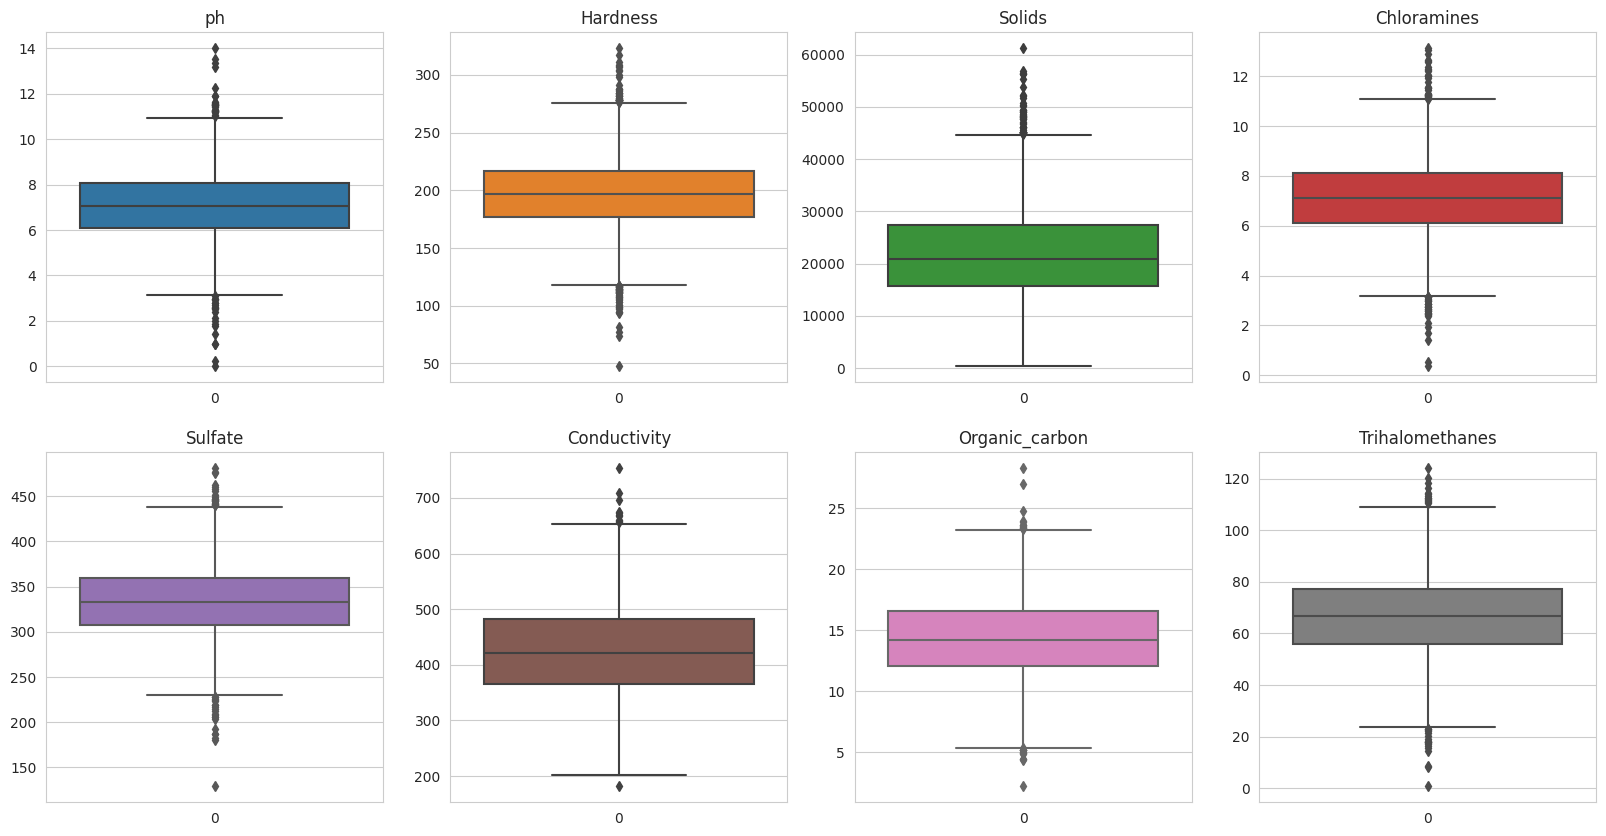

In [7]:
# BOXPLOTS
_, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
sns.set_style("whitegrid")
i,j,ncol = 0,0,0
colors =list(mcolors.TABLEAU_COLORS.values())

for v in n_water:
    variable = n_water[v]
    sns.boxplot(variable, ax=axes[i][j], color = colors[ncol])
    axes[i][j].set_title(v)
    j = j+1
    ncol = ncol + 1
    if j>=4:
        i = i+1
        j = j%4
plt.show()
    

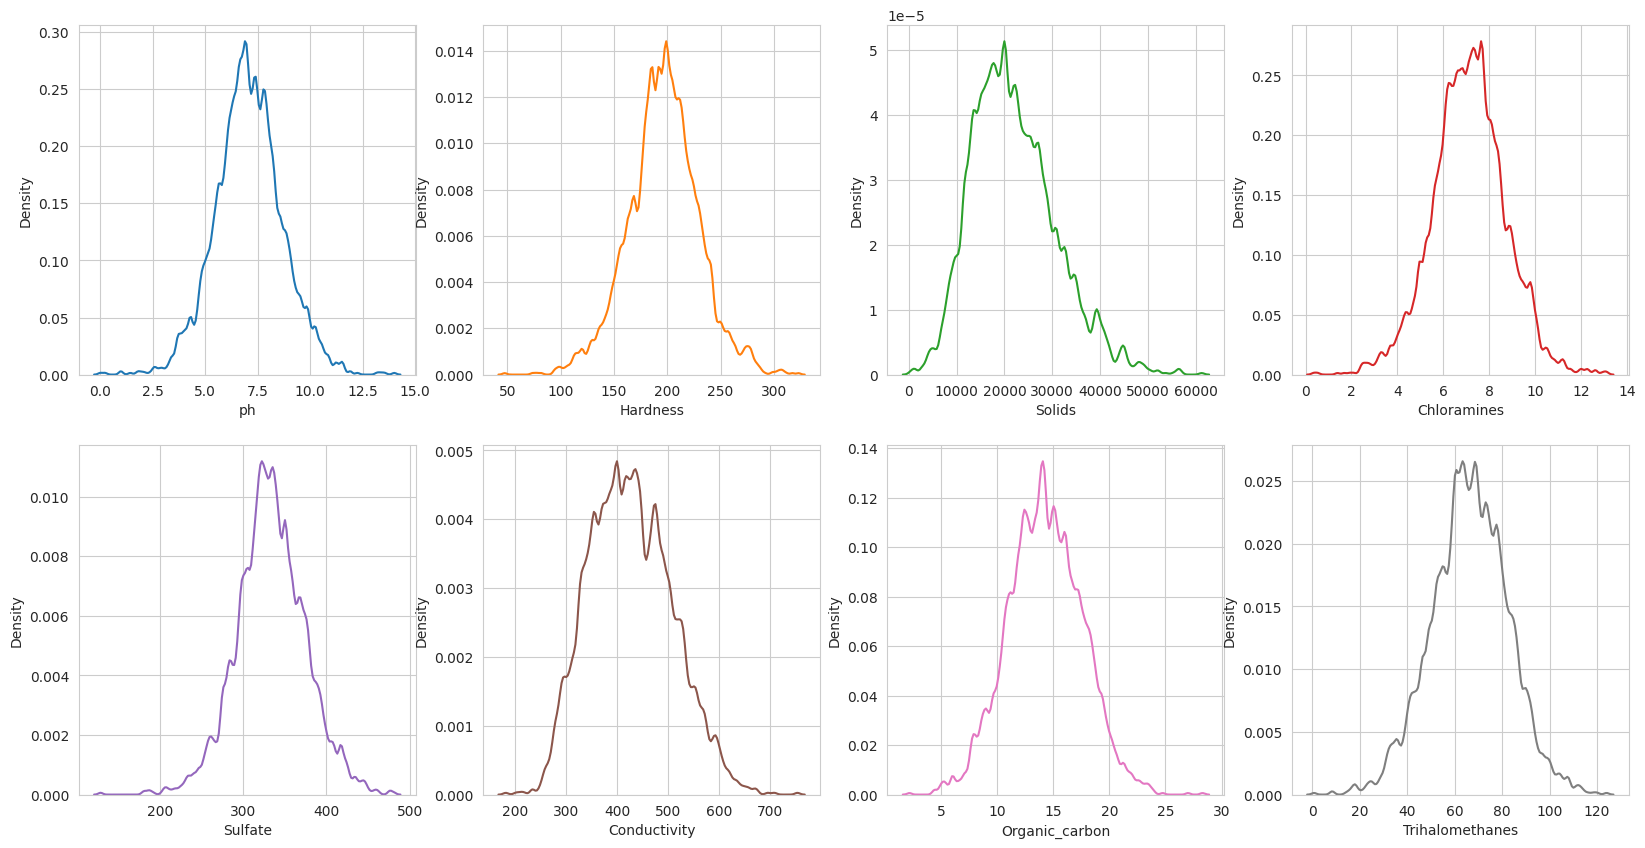

In [8]:
# DENSITIES
_, axes = plt.subplots(nrows=2, ncols=4, figsize = (20,10))
i,j,ncol = 0,0,0

for v in n_water:
    variable = n_water[v]
    sns.kdeplot(variable, ax=axes[i][j], color = colors[ncol], bw_adjust=.3)
    j = j+1
    ncol = ncol + 1
    if j>=4:
        i = i+1
        j = j%4
plt.show()

From both the boxplots and the graphs of the densities of the variables, it can be inferred that the distributions of all the numerical variables are almost symmetrical. The only variable with slightly unbalanced data distributions is the variable 'Solids'; this imbalance is probably due to the large presence of outliers.

Having done the analysis of the numeric variables, we now turn to analyze our target variable 'Potability': we know that it is a binary factor with values '0' and '1'. Let us now look at the frequency of each variable level in the dataset.

In [9]:
print(water['Potability'].value_counts())

0    1998
1    1278
Name: Potability, dtype: int64


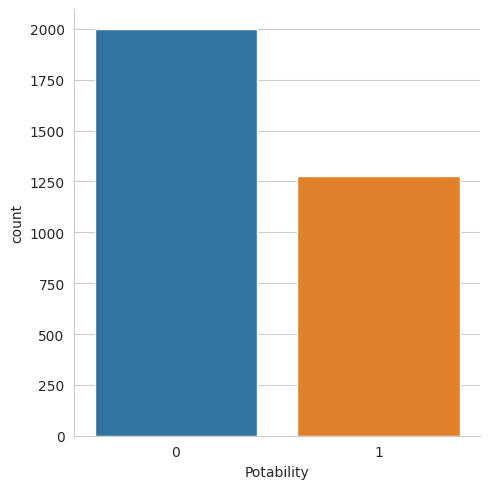

In [10]:
sns.catplot(data = water, x='Potability', kind='count')
plt.show()

It is easy to see that the dataset is slightly skewed toward outputs '0'.

## Multivariate Analysis

At this stage we will try to study and analyze the possible relationships between the variables, particularly between the categorical variable and the numerical variables. Initially we will plot a pairsplots matrix in which in the diagonal are shown the density functions of each variable in relation to the 'potability class' to which they belong, and outside the diagonal are drawn the distributions of points in the planes having for dimensions the variables of the respective row and column.

In [11]:
#PairPlot with splitted Distributions
sns.set_theme(style="ticks")
sns.pairplot(water, hue="Potability")
plt.show()

It is easy to notice how, in the two-dimensional plans no clusters are present with respect to the categorical variable 'Potability,' so there is no clear visual distinction between the two levels of the factor. This could lead us to a deeper search, perhaps in some multi-dimensional space.

At this point we go looking for possible collinearity between variables. To do this, we consider the covariance matrix between the variables and look for, if present, very high values of correlation.

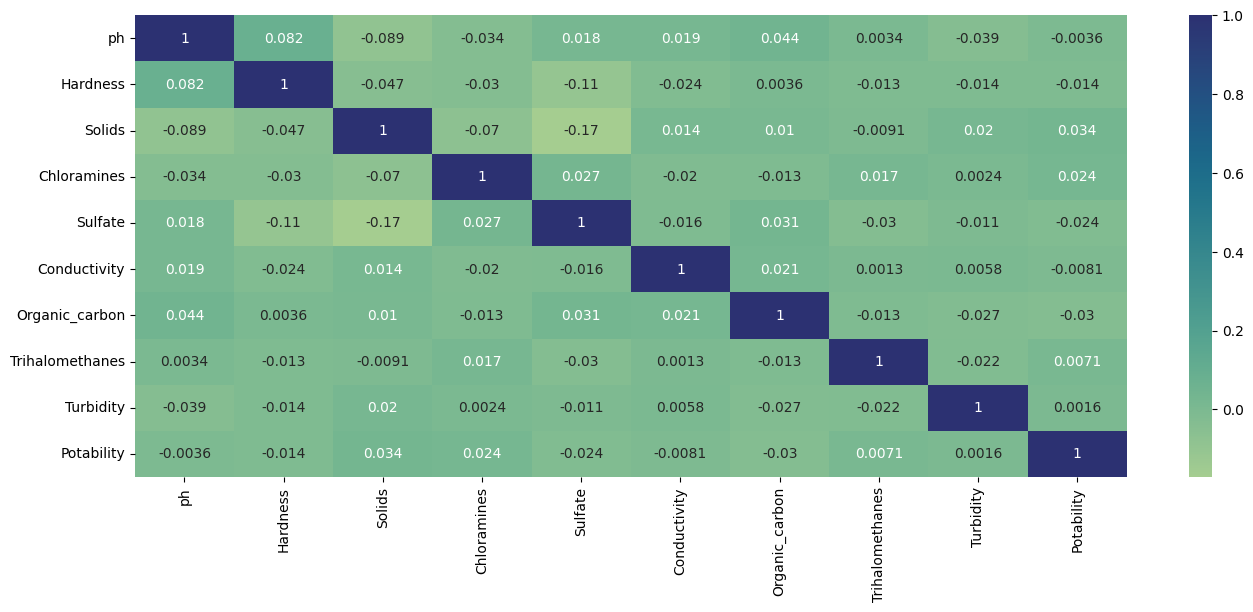

In [7]:
# CORRELATION MATRIX
plt.figure(figsize=(16, 6))
sns.heatmap(water.corr(),annot=True,cmap="crest")
plt.show()

We note that all the variables are two by two highly uncorrelated, so we can say that there is no collinearity. 

In [48]:
# Variation Inflaction Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_clean=n_water.fillna(n_water.mean())
X = add_constant(df_clean)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const              262.759618
ph                   1.015434
Hardness             1.019837
Solids               1.038799
Chloramines          1.008197
Sulfate              1.035684
Conductivity         1.002156
Organic_carbon       1.003310
Trihalomethanes      1.001492
dtype: float64

## Results of the analysis

From the analysis just performed, we saw how some variables contain several missing values. In particular, it immediately comes to the eye that almost one-third of the observations of the variable 'Sulfate' have missing value. From this, in order to understand the influence of these missing values in the dataset, we decided to employ the following strategy: \
Writing a python scrypt with a function inside that allows us to choose, after scaling the data, whether to eliminate from the dataframe a variable with missing values and/or a percentage (to be given as input) of missing observations, the remaining part of missing values not eliminated from the dataset, can be replaced by a statistically significant value (such as mean or median).

The idea will be to evaluate machine learning models, built using both supervised and unsupervised learning techniques, with different datasets derived from modeling the initial dataset and then evaluate the metrics obtained.